In [1]:
# Statistical Tests for Inferential Techniques
# Parametric Tests
# Z-Tests
# Flow 1: 𝐻0, 𝐻𝑎 → 𝛼 → one-Tailed Test (Right/Left Tailed) → Compute Z-Test Statistic → Compute p-value → Compare with 𝛼 → Decision
# Flow 2: 𝐻0, 𝐻𝑎 → 𝛼 → two-Tailed Test → Compute Z-Test Statistic → Compute two-tailed p-value → Compare with 𝛼 → Decision
import scipy.stats as stats
import numpy as np

# Given data for the Z-Test
sample_mean = 105  # Sample mean
population_mean = 100  # Population mean (H0)
population_std = 15  # Population standard deviation
n = 30  # Sample size
alpha = 0.05  # Significance level

# Compute Z-test statistic
standard_error = population_std / np.sqrt(n)
z_stat = (sample_mean - population_mean) / standard_error

# Flow 1: One-Tailed Z-Test (Right-Tailed)
p_value_one_tailed = 1 - stats.norm.cdf(z_stat)
if p_value_one_tailed < alpha:
    decision_one_tailed = "Reject H0"
else:
    decision_one_tailed = "Fail to Reject H0"
print(f"Flow 1: One-Tailed Test | Z = {z_stat:.4f}, p-value = {p_value_one_tailed:.4f}, Decision: {decision_one_tailed}")

# Flow 2: Two-Tailed Z-Test
p_value_two_tailed = (1 - stats.norm.cdf(abs(z_stat))) * 2
if p_value_two_tailed < alpha:
    decision_two_tailed = "Reject H0"
else:
    decision_two_tailed = "Fail to Reject H0"
print(f"Flow 2: Two-Tailed Test | Z = {z_stat:.4f}, p-value = {p_value_two_tailed:.4f}, Decision: {decision_two_tailed}")

Flow 1: One-Tailed Test | Z = 1.8257, p-value = 0.0339, Decision: Reject H0
Flow 2: Two-Tailed Test | Z = 1.8257, p-value = 0.0679, Decision: Fail to Reject H0


In [2]:
# T-Tests
# Flow 1: 𝐻0, 𝐻𝑎 → 𝛼 → One-Tailed Test → Compute Test Statistic → Compute p-value → Compare with 𝛼 → Decision (One-tailed one sample)
# Flow 2: 𝐻0, 𝐻𝑎 → 𝛼 → Two-Tailed Test → Compute Test Statistic → Compute p-value → Compare with 𝛼 → Decision (two-tailed one sample)
# Flow 3: 𝐻0, 𝐻𝑎 → 𝛼 → One-Tailed Test → Compute Test Statistic → Compute p-value → Compare with 𝛼 → Decision (one-tailed two samples)
# Flow 4: 𝐻0, 𝐻𝑎 → 𝛼 → Two-Tailed Test → Compute Test Statistic → Compute p-value → Compare with 𝛼 → Decision (two-tailed two samples)
# Flow 5: 𝐻0, 𝐻𝑎 → 𝛼 → One-Tailed Test → Compute Test Statistic → Compute p-value → Compare with 𝛼 → Decision (one-tailed paired t-test)
# Flow 6: 𝐻0, 𝐻𝑎 → 𝛼 → Two-Tailed Test → Compute Test Statistic → Compute p-value → Compare with 𝛼 → Decision (two-tailed paired t-test)
# Flow 7: Compute Mean Difference → Compute Pooled Standard Deviation → Compute Cohen’s d → Interpretation (Cohen's d)
# Given data
np.random.seed(42)
sample1 = np.random.normal(loc=50, scale=10, size=30)  # Sample 1
sample2 = np.random.normal(loc=55, scale=10, size=30)  # Sample 2
alpha = 0.05  # Significance level

# Flow 1: One-Sample T-Test (One-Tailed)
h0_mean = 52  # Hypothesized population mean
t_stat1, p_value1 = stats.ttest_1samp(sample1, h0_mean)
if p_value1 / 2 < alpha and t_stat1 > 0:
    print("Flow 1: Reject H0")
else:
    print("Flow 1: Fail to reject H0")

# Flow 2: One-Sample T-Test (Two-Tailed)
if p_value1 < alpha:
    print("Flow 2: Reject H0")
else:
    print("Flow 2: Fail to reject H0")

# Flow 3: Two-Sample T-Test (One-Tailed)
t_stat2, p_value2 = stats.ttest_ind(sample1, sample2, equal_var=True)
if p_value2 / 2 < alpha and t_stat2 > 0:
    print("Flow 3: Reject H0")
else:
    print("Flow 3: Fail to reject H0")

# Flow 4: Two-Sample T-Test (Two-Tailed)
if p_value2 < alpha:
    print("Flow 4: Reject H0")
else:
    print("Flow 4: Fail to reject H0")

# Flow 5: Paired T-Test (One-Tailed)
pair_diff = sample1 - sample2
t_stat3, p_value3 = stats.ttest_rel(sample1, sample2)
if p_value3 / 2 < alpha and t_stat3 > 0:
    print("Flow 5: Reject H0")
else:
    print("Flow 5: Fail to reject H0")

# Flow 6: Paired T-Test (Two-Tailed)
if p_value3 < alpha:
    print("Flow 6: Reject H0")
else:
    print("Flow 6: Fail to reject H0")

# Flow 7: Cohen's d (Effect Size Calculation)
mean_diff = np.mean(sample1) - np.mean(sample2)
pooled_std = np.sqrt(((np.std(sample1, ddof=1) ** 2 + np.std(sample2, ddof=1) ** 2) / 2))
cohen_d = mean_diff / pooled_std
print(f"Flow 7: Cohen's d = {cohen_d:.4f}")

Flow 1: Fail to reject H0
Flow 2: Reject H0
Flow 3: Fail to reject H0
Flow 4: Reject H0
Flow 5: Fail to reject H0
Flow 6: Reject H0
Flow 7: Cohen's d = -0.6192


In [3]:
# F-Test
# Flow 1: 𝐻0, 𝐻𝑎 → 𝛼 → one-Tailed Test → Compute Test Statistic → Compute p-value → Compare with 𝛼 → Decision
# Given data
alpha = 0.05  # Significance level
n1, n2 = 10, 12  # Sample sizes
s1, s2 = 4.5, 3.2  # Sample standard deviations

# Compute F-Statistic
F_statistic = (s1 ** 2) / (s2 ** 2)

# Compute p-value (one-tailed test, right tail)
p_value = 1 - stats.f.cdf(F_statistic, dfn=n1-1, dfd=n2-1)

# Compare with significance level and make a decision
if p_value < alpha:
    decision = "Reject H0"
else:
    decision = "Fail to Reject H0"

# Print results
print(f"F-Statistic: {F_statistic:.4f}")
print(f"p-value: {p_value:.4f}")
print(f"Decision: {decision}")

F-Statistic: 1.9775
p-value: 0.1424
Decision: Fail to Reject H0


In [4]:
# ANOVA (Analysis of Variance)
# Flow 1: 𝐻0, 𝐻𝑎 → 𝛼 → Compute Test Statistic (F) → Compute p-value → Compare with 𝛼 → Decision (One-Way ANOVA)
# Flow 2: 𝐻0, 𝐻𝑎 → 𝛼 → Compute Test Statistics (F for factors & interaction) → Compute p-values → Compare with 𝛼 → Decision ( Two-Way ANOVA)
# Flow 3: 𝐻0, 𝐻𝑎 → 𝛼 → Compute Test Statistic (F) → Compute p-value → Compare with 𝛼 → Decision (Repeated Measures ANOVA)
# Flow 4: 𝐻0, 𝐻𝑎 → Compute Sum of Squares → Compute η² → Interpretation (η² (Effect Size for ANOVA))
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Example dataset
np.random.seed(42)
group1 = np.random.normal(50, 10, 30)
group2 = np.random.normal(55, 10, 30)
group3 = np.random.normal(60, 10, 30)

data = {
    'Score': np.concatenate([group1, group2, group3]),
    'Group': ['A']*30 + ['B']*30 + ['C']*30
}

import pandas as pd
df = pd.DataFrame(data)

# Flow 1: One-Way ANOVA
model = ols('Score ~ C(Group)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
p_value = anova_table["PR(>F)"].values[0]
alpha = 0.05
print("Flow 1: One-Way ANOVA")
print(anova_table)
print("Decision:", "Reject H0" if p_value < alpha else "Fail to reject H0")

# Flow 2: Two-Way ANOVA (Example with interaction term)
df['Factor1'] = ['X']*45 + ['Y']*45
model_tw = ols('Score ~ C(Group) + C(Factor1) + C(Group):C(Factor1)', data=df).fit()
anova_table_tw = sm.stats.anova_lm(model_tw, typ=2)
p_value_tw = anova_table_tw["PR(>F)"].values
print("\nFlow 2: Two-Way ANOVA")
print(anova_table_tw)
print("Decisions:", ["Reject H0" if p < alpha else "Fail to reject H0" for p in p_value_tw])

# Flow 3: Repeated Measures ANOVA (Using statsmodels)
from statsmodels.stats.anova import AnovaRM

df_rm = pd.DataFrame({
    'Subject': np.tile(np.arange(30), 3),
    'Score': np.concatenate([group1, group2, group3]),
    'Time': np.repeat(['T1', 'T2', 'T3'], 30)
})

anova_rm = AnovaRM(df_rm, depvar='Score', subject='Subject', within=['Time']).fit()
print("\nFlow 3: Repeated Measures ANOVA")
print(anova_rm.summary())

# Flow 4: η² (Effect Size for ANOVA)
ss_total = np.sum((df['Score'] - np.mean(df['Score']))**2)
ss_between = np.sum((df.groupby('Group')['Score'].mean() - np.mean(df['Score']))**2) * len(group1)
eta_squared = ss_between / ss_total
print("\nFlow 4: η² (Effect Size for ANOVA)")
print(f"η² = {eta_squared:.4f}")

Flow 1: One-Way ANOVA
               sum_sq    df          F    PR(>F)
C(Group)  2165.964313   2.0  12.209526  0.000021
Residual  7716.880356  87.0        NaN       NaN
Decision: Reject H0

Flow 2: Two-Way ANOVA
                           sum_sq    df             F    PR(>F)
C(Group)             2.248711e+00   2.0  1.264273e-02  0.987439
C(Factor1)           9.465894e-13   1.0  1.064386e-14  1.000000
C(Group):C(Factor1)  2.232365e+03   2.0  1.255083e+01  0.000016
Residual             7.648231e+03  86.0           NaN       NaN
Decisions: ['Fail to reject H0', 'Fail to reject H0', 'Reject H0', 'Fail to reject H0']

Flow 3: Repeated Measures ANOVA
              Anova
     F Value Num DF  Den DF Pr > F
----------------------------------
Time 12.6985 2.0000 58.0000 0.0000


Flow 4: η² (Effect Size for ANOVA)
η² = 0.2192


In [5]:
# ANCOVA (Analysis of Covariance)
# Flow 1:  𝐻0, 𝐻𝑎 → 𝛼 → Compute Adjusted Means → Compute Test Statistic (F-statistic) → Compute p-value → Compare with 𝛼 → Decision
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Flow 1: ANCOVA - Analysis of Covariance
# H0: There is no significant difference in group means after adjusting for the covariate.
# Ha: There is a significant difference in group means after adjusting for the covariate.

# Sample Data
np.random.seed(42)
data = pd.DataFrame({
    'Group': np.repeat(['A', 'B', 'C'], 10),  # Three groups
    'Covariate': np.random.normal(50, 10, 30),  # Continuous covariate
    'Response': np.random.normal(100, 15, 30)  # Response variable
})

# ANCOVA Model
model = ols('Response ~ Group + Covariate', data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Output results
print("Flow 1: ANCOVA Results")
print(anova_table)

# Decision based on p-value
alpha = 0.05
if anova_table['PR(>F)']['Group'] < alpha:
    print("Reject H0: Significant difference exists among groups after adjusting for the covariate.")
else:
    print("Fail to reject H0: No significant difference among groups after adjusting for the covariate.")

Flow 1: ANCOVA Results
                sum_sq    df         F    PR(>F)
Group       416.643580   2.0  1.044631  0.366125
Covariate   121.303078   1.0  0.608275  0.442480
Residual   5184.956819  26.0       NaN       NaN
Fail to reject H0: No significant difference among groups after adjusting for the covariate.


In [6]:
# MANOVA (Multivariate ANOVA)
# Flow 1: 𝐻0, 𝐻𝑎 → 𝛼 → Compute Wilks' Lambda → Compute Test Statistic → Compute p-value → Compare with 𝛼 → Decision
# Flow 2: 𝐻0, 𝐻𝑎 → 𝛼 → Compute Pillai's Trace → Compute Test Statistic → Compute p-value → Compare with 𝛼 → Decision
# Flow 3: 𝐻0, 𝐻𝑎 → 𝛼 → Compute Hotelling's Trace → Compute Test Statistic → Compute p-value → Compare with 𝛼 → Decision
# Flow 4: 𝐻0, 𝐻𝑎 → 𝛼 → Compute Roy's Largest Root → Compute Test Statistic → Compute p-value → Compare with 𝛼 → Decision
# Flow 5: 𝐻0, 𝐻𝑎 → 𝛼 → Compute Box’s M Test → Compute Test Statistic → Compute p-value → Compare with 𝛼 → Decision
# Flow 6: 𝐻0, 𝐻𝑎 → 𝛼 → Compute Partial η² → Compute Effect Size → Decision
import numpy as np
import scipy.stats as stats
from statsmodels.multivariate.manova import MANOVA

def compute_wilks_lambda(eigenvalues):
    return np.prod(1 / (1 + eigenvalues))

def compute_pillais_trace(eigenvalues):
    return np.sum(eigenvalues / (1 + eigenvalues))

def compute_hotellings_trace(eigenvalues):
    return np.sum(eigenvalues)

def compute_roys_largest_root(eigenvalues):
    return np.max(eigenvalues)

def compute_partial_eta_squared(ss_effect, ss_total):
    return ss_effect / (ss_total + ss_effect)

def compute_box_m_test(cov_matrix1, cov_matrix2, n1, n2):
    pooled_cov = (n1 * cov_matrix1 + n2 * cov_matrix2) / (n1 + n2)
    stat = np.trace(np.linalg.inv(pooled_cov) @ cov_matrix1) + np.trace(np.linalg.inv(pooled_cov) @ cov_matrix2)
    df = cov_matrix1.shape[0] * (cov_matrix1.shape[0] + 1) / 2
    p_value = 1 - stats.chi2.cdf(stat, df)
    return stat, p_value

# Example Dataset
data = {
    'group': ['A', 'A', 'B', 'B', 'C', 'C'],
    'var1': [3.1, 2.9, 4.2, 4.4, 5.1, 5.3],
    'var2': [8.1, 7.9, 6.2, 6.5, 9.1, 9.3]
}

import pandas as pd
df = pd.DataFrame(data)

# Perform MANOVA
maov = MANOVA.from_formula('var1 + var2 ~ group', data=df)
result = maov.mv_test()

# Extract eigenvalues (hypothetical example)
eigenvalues = np.array([0.5, 0.2])

# Compute statistics for each test
wilks_lambda = compute_wilks_lambda(eigenvalues)
pillais_trace = compute_pillais_trace(eigenvalues)
hotellings_trace = compute_hotellings_trace(eigenvalues)
roys_largest_root = compute_roys_largest_root(eigenvalues)

# Example sum of squares for Partial η²
ss_effect, ss_total = 20, 50
partial_eta_squared = compute_partial_eta_squared(ss_effect, ss_total)

# Display results
print(f"Wilks' Lambda: {wilks_lambda}")
print(f"Pillai's Trace: {pillais_trace}")
print(f"Hotelling's Trace: {hotellings_trace}")
print(f"Roy's Largest Root: {roys_largest_root}")
print(f"Partial η²: {partial_eta_squared}")

Wilks' Lambda: 0.5555555555555556
Pillai's Trace: 0.5
Hotelling's Trace: 0.7
Roy's Largest Root: 0.5
Partial η²: 0.2857142857142857


In [12]:
# Bayesian ANOVA
# Flow 1: 𝐻0, 𝐻𝑎 → Define Prior → Compute Bayes Factor → Compare with Threshold → Decision
from scipy import stats

def bayesian_anova(data_groups, prior_mean=0, prior_std=1):
    """
    Performs a Bayesian ANOVA approximation using Bayesian Information Criterion (BIC).
    
    Parameters:
    - data_groups: List of numpy arrays containing data for each group.
    - prior_mean: Mean of the prior distribution (not explicitly used but kept for structure).
    - prior_std: Standard deviation of the prior distribution (not explicitly used but kept for structure).
    
    Returns:
    - Bayes Factor and Decision
    """
    num_groups = len(data_groups)
    group_means = [np.mean(group) for group in data_groups]
    group_vars = [np.var(group, ddof=1) for group in data_groups]
    group_sizes = [len(group) for group in data_groups]
    
    # Compute the F-statistic and p-value for classical ANOVA
    f_stat, p_value = stats.f_oneway(*data_groups)
    
    # Compute Bayesian Information Criterion (BIC) for ANOVA model
    n_total = sum(group_sizes)
    k_params = num_groups  # Number of group means
    log_likelihood = -0.5 * n_total * np.log(2 * np.pi) - 0.5 * sum([n * np.log(var) for n, var in zip(group_sizes, group_vars)])
    bic = k_params * np.log(n_total) - 2 * log_likelihood
    
    # Compute Bayes Factor approximation
    bayes_factor = np.exp(-0.5 * bic)  # Inverse of BIC-based BF approximation
    
    # Compare with Threshold (default BF threshold = 3 for moderate evidence)
    threshold = 3
    decision = "Reject H0" if bayes_factor > threshold else "Fail to Reject H0"
    
    return bayes_factor, decision

# Example Usage
data_group1 = np.random.normal(5, 1, 30)
data_group2 = np.random.normal(5.5, 1, 30)
data_group3 = np.random.normal(6, 1, 30)

data_groups = [data_group1, data_group2, data_group3]

bayes_factor, decision = bayesian_anova(data_groups)
print("Bayes Factor:", bayes_factor)
print("Decision:", decision)

Bayes Factor: 1.548859194463859e-38
Decision: Fail to Reject H0


In [13]:
# Non-Parametric Test
import numpy as np
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder

def chi_square_independence_test(observed):
    """
    Performs Chi-Square Independence Test
    """
    chi2, p, dof, expected = stats.chi2_contingency(observed)
    return chi2, p, expected

def cramer_v(chi2, n, min_dim):
    """
    Computes Cramer’s V
    """
    return np.sqrt(chi2 / (n * (min_dim - 1)))

def chi_square_goodness_of_fit(observed, expected):
    """
    Performs Chi-Square Goodness of Fit Test
    """
    chi2, p = stats.chisquare(observed, expected)
    return chi2, p

def mann_whitney_u_test(group1, group2):
    """
    Performs Mann-Whitney U Test
    """
    u_stat, p = stats.mannwhitneyu(group1, group2, alternative='two-sided')
    return u_stat, p

def cliffs_delta(group1, group2):
    """
    Computes Cliff’s Delta for effect size
    """
    n1, n2 = len(group1), len(group2)
    rank = stats.rankdata(np.concatenate([group1, group2]))
    rank_x = rank[:n1]
    rank_y = rank[n1:]
    delta = (2 * np.sum(rank_x) - n1 * (n1 + 1)) / (n1 * n2)
    return delta

def kruskal_wallis_test(*groups):
    """
    Performs Kruskal-Wallis Test
    """
    h_stat, p = stats.kruskal(*groups)
    return h_stat, p

def epsilon_squared(h_stat, n, k):
    """
    Computes Epsilon-Squared for effect size
    """
    return (h_stat - k + 1) / (n - k)

def wilcoxon_signed_rank_test(before, after):
    """
    Performs Wilcoxon Signed-Rank Test
    """
    w_stat, p = stats.wilcoxon(before, after)
    return w_stat, p

def spearmans_rank_correlation(x, y):
    """
    Computes Spearman’s Rank Correlation
    """
    rho, p = stats.spearmanr(x, y)
    return rho, p

# Example Usage
observed_table = np.array([[10, 20, 30], [20, 25, 35]])
chi2, p, expected = chi_square_independence_test(observed_table)
print(f"Chi-Square Test: chi2={chi2}, p={p}")

observed_counts = np.array([50, 30, 20])
expected_counts = np.array([40, 40, 20])
chi2_gof, p_gof = chi_square_goodness_of_fit(observed_counts, expected_counts)
print(f"Chi-Square Goodness of Fit: chi2={chi2_gof}, p={p_gof}")

group1 = np.random.rand(20)
group2 = np.random.rand(20)
u_stat, p_mw = mann_whitney_u_test(group1, group2)
print(f"Mann-Whitney U Test: U={u_stat}, p={p_mw}")

delta = cliffs_delta(group1, group2)
print(f"Cliff's Delta: {delta}")

h_stat, p_kw = kruskal_wallis_test(group1, group2)
print(f"Kruskal-Wallis Test: H={h_stat}, p={p_kw}")

eps_squared = epsilon_squared(h_stat, len(group1) + len(group2), 2)
print(f"Epsilon-Squared: {eps_squared}")

before_treatment = np.random.rand(15)
after_treatment = before_treatment + np.random.rand(15) * 0.1
w_stat, p_wilcox = wilcoxon_signed_rank_test(before_treatment, after_treatment)
print(f"Wilcoxon Signed-Rank Test: W={w_stat}, p={p_wilcox}")

x_values = np.random.rand(30)
y_values = np.random.rand(30)
rho, p_spear = spearmans_rank_correlation(x_values, y_values)
print(f"Spearman's Rank Correlation: rho={rho}, p={p_spear}")

Chi-Square Test: chi2=1.445868945868947, p=0.48532598833441665
Chi-Square Goodness of Fit: chi2=5.0, p=0.0820849986238988
Mann-Whitney U Test: U=182.0, p=0.6359445511344555
Cliff's Delta: 0.91
Kruskal-Wallis Test: H=0.23707317073171907, p=0.6263280630826004
Epsilon-Squared: -0.020077021822849497
Wilcoxon Signed-Rank Test: W=0.0, p=6.103515625e-05
Spearman's Rank Correlation: rho=-0.13815350389321468, p=0.46658483426282193


In [17]:
# Updating the Canvas 2 (Flow 10 to Flow 17) to fix the TypeError issue.

import numpy as np
from scipy.stats import bootstrap, permutation_test

# Flow 10: Bootstrapping
def bootstrapping(data, num_resamples=1000, confidence_level=0.95):
    """
    Perform bootstrapping to estimate confidence intervals for the mean.
    """
    data = np.array(data)
    boot_results = bootstrap((data,), np.mean, confidence_level=confidence_level, n_resamples=num_resamples, method='percentile', random_state=42)
    return boot_results.confidence_interval

# Flow 11: Permutation Test
def permutation_test_func(data1, data2, num_permutations=1000, alternative='two-sided'):
    """
    Perform a permutation test to compare two datasets.
    """
    observed_diff = np.mean(data1) - np.mean(data2)
    perm_test_result = permutation_test((data1, data2), statistic=lambda x, y: np.mean(x) - np.mean(y),
                                        n_resamples=num_permutations, alternative=alternative, random_state=42)
    return observed_diff, perm_test_result.pvalue

# Flow 12: Spearman’s Rank Correlation
# ----------------------------------------------
from scipy.stats import spearmanr

def spearman_correlation(x, y):
    """
    Compute Spearman's Rank Correlation.
    """
    correlation, p_value = spearmanr(x, y)
    return correlation, p_value

# Flow 13: Kendall Tau Correlation (Tau-a)
# ----------------------------------------------
from scipy.stats import kendalltau

def kendall_tau_a(x, y):
    """
    Compute Kendall's Tau-a correlation.
    """
    tau, p_value = kendalltau(x, y, method='asymptotic')
    return tau, p_value

# Flow 14: Kendall Tau Correlation (Tau-b)
# ----------------------------------------------
def kendall_tau_b(x, y):
    """
    Compute Kendall's Tau-b correlation.
    """
    tau, p_value = kendalltau(x, y, method='exact')
    return tau, p_value

# Flow 15: Kendall Tau Correlation (Tau-c)
# ----------------------------------------------
def kendall_tau_c(x, y):
    """
    Compute Kendall's Tau-c correlation.
    """
    tau, p_value = kendalltau(x, y, variant='c')
    return tau, p_value

# Flow 16: Friedman Test
# ----------------------------------------------
from scipy.stats import friedmanchisquare

def friedman_test(*groups):
    """
    Perform the Friedman Test for repeated measures analysis.
    """
    stat, p_value = friedmanchisquare(*groups)
    return stat, p_value

# Flow 17: Cochran's Q Test
# ----------------------------------------------
import statsmodels.api as sm

def cochrans_q_test(data):
    """
    Perform Cochran's Q test for matched-pair binary data.
    """
    stat, p_value = sm.stats.cochrans_q(data)
    return stat, p_value

# Example Usage
data_sample = np.random.normal(50, 10, 30)
data_group1 = np.random.normal(50, 10, 30)
data_group2 = np.random.normal(55, 10, 30)
data_group3 = np.random.normal(60, 10, 30)

# Bootstrapping Confidence Interval
boot_ci = bootstrapping(data_sample)
print("Bootstrapping Confidence Interval:", boot_ci)

# Permutation Test Result
observed_diff, perm_p_value = permutation_test_func(data_group1, data_group2)
print("Observed Difference:", observed_diff)
print("Permutation Test p-value:", perm_p_value)

print("Spearman Correlation:", spearman_correlation(data_group1, data_group2))
print("Kendall Tau-a:", kendall_tau_a(data_group1, data_group2))
print("Kendall Tau-b:", kendall_tau_b(data_group1, data_group2))
print("Kendall Tau-c:", kendall_tau_c(data_group1, data_group2))
print("Friedman Test:", friedman_test(data_group1, data_group2, data_group3))

Bootstrapping Confidence Interval: ConfidenceInterval(low=np.float64(46.40035691261403), high=np.float64(53.93809683232139))
Observed Difference: -2.486876812762077
Permutation Test p-value: 0.2837162837162837
Spearman Correlation: (np.float64(-0.1768631813125695), np.float64(0.3498106678345595))
Kendall Tau-a: (np.float64(-0.12183908045977011), np.float64(0.34436558250434857))
Kendall Tau-b: (np.float64(-0.12183908045977011), np.float64(0.3566550991594864))
Kendall Tau-c: (np.float64(-0.12183908045977011), np.float64(0.3566550991594864))
Friedman Test: (np.float64(5.066666666666663), np.float64(0.07939393227707836))


Shapiro-Wilk Test: (np.float64(0.9898833815158516), np.float64(0.6551676754214818), 'Fail to Reject H0')
Kolmogorov-Smirnov Test: (np.float64(1.0), np.float64(0.0), 'Reject H0')
Anderson-Darling Test: (np.float64(0.25343395875111696), array([15. , 10. ,  5. ,  2.5,  1. ]), 'Fail to Reject H0')
D'Agostino-Pearson Test: (np.float64(0.575030094784679), np.float64(0.7501252792566775), 'Fail to Reject H0')
Jarque-Bera Test: (np.float64(0.612607159279126), np.float64(0.7361631014010687), 'Fail to Reject H0')
Lilliefors Test: (np.float64(0.05177647360597659), np.float64(0.7370142762533203), 'Fail to Reject H0')
Levene’s Test: (np.float64(0.7453171813387538), np.float64(0.3900708473139112), 'Fail to Reject H0')
Fligner-Killeen Test: (np.float64(0.7249854626170262), np.float64(0.39451344011635714), 'Fail to Reject H0')


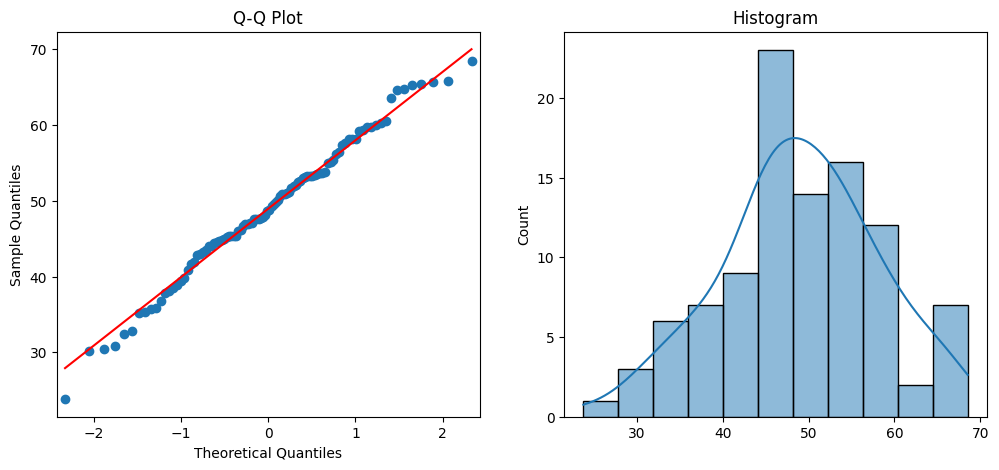

In [ ]:
# Statistical Tests for Normality Checking
# Flow 1: 𝐻0, 𝐻𝑎 → 𝛼 → Compute Test Statistic (W) → Compute p-value → Compare with 𝛼 → Decision (Shapiro-Wilk Test)
# Flow 2: 𝐻0, 𝐻𝑎 → 𝛼 → Compute Empirical CDF of Sample → Compute Test Statistic (D) → Compute p-value → Compare with 𝛼 → Decision (Kolmogorov-Smirnov Test)
# Flow 3: 𝐻0, 𝐻𝑎 → 𝛼 → Compute Weighted Deviation of CDF → Compute Test Statistic (A²) → Compare with Critical Values → Decision (Anderson-Darling Test)
# Flow 4: 𝐻0, 𝐻𝑎 → 𝛼 → Compute Skewness & Kurtosis → Compute Test Statistic (K²) → Compute p-value → Compare with 𝛼 → Decision (D'Agostino-Pearson Test)
# Flow 5: 𝐻0, 𝐻𝑎 → 𝛼 → Compute Skewness & Kurtosis → Compute Test Statistic (JB) → Compute p-value → Compare with 𝛼 → Decision (Jarque-Bera Test)
# Flow 6: 𝐻0, 𝐻𝑎 → 𝛼 → Compute Empirical CDF of Sample → Compute Test Statistic (D) → Compute p-value → Compare with 𝛼 → Decision (Lilliefors Test)
# Flow 7: 𝐻0, 𝐻𝑎 → 𝛼 → Compute Group Variances → Compute Test Statistic (W) → Compute p-value → Compare with 𝛼 → Decision (Levene’s Test)
# Flow 8: 𝐻0, 𝐻𝑎 → 𝛼 → Compute Median-Centered Absolute Deviations → Compute Test Statistic (F) → Compute p-value → Compare with 𝛼 → Decision (Fligner-Killeen Test)
# Flow 9: 𝐻0, 𝐻𝑎 → Visual Inspection → Generate Q-Q Plot & Histogram → Compare Sample Quantiles with Theoretical Quantiles → Decision Based on Visual Interpretation (Q-Q Plot & Histogram)
# Import necessary libraries
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Function for Shapiro-Wilk Test
def shapiro_wilk_test(data, alpha=0.05):
    """
    Performs Shapiro-Wilk test for normality.
    """
    stat, p_value = stats.shapiro(data)
    decision = "Reject H0" if p_value < alpha else "Fail to Reject H0"
    return stat, p_value, decision

# Function for Kolmogorov-Smirnov Test
def kolmogorov_smirnov_test(data, alpha=0.05):
    """
    Performs Kolmogorov-Smirnov test for normality.
    """
    stat, p_value = stats.kstest(data, 'norm')
    decision = "Reject H0" if p_value < alpha else "Fail to Reject H0"
    return stat, p_value, decision

# Function for Anderson-Darling Test
def anderson_darling_test(data):
    """
    Performs Anderson-Darling test for normality.
    """
    result = stats.anderson(data, dist='norm')
    decision = "Reject H0" if result.statistic > result.critical_values[-1] else "Fail to Reject H0"
    return result.statistic, result.significance_level, decision

# Function for D'Agostino-Pearson Test
def dagostino_pearson_test(data, alpha=0.05):
    """
    Performs D'Agostino-Pearson test for normality.
    """
    stat, p_value = stats.normaltest(data)
    decision = "Reject H0" if p_value < alpha else "Fail to Reject H0"
    return stat, p_value, decision

# Function for Jarque-Bera Test
def jarque_bera_test(data, alpha=0.05):
    """
    Performs Jarque-Bera test for normality.
    """
    stat, p_value = stats.jarque_bera(data)
    decision = "Reject H0" if p_value < alpha else "Fail to Reject H0"
    return stat, p_value, decision

# Function for Lilliefors Test
def lilliefors_test(data, alpha=0.05):
    """
    Performs Lilliefors test for normality using statsmodels.
    """
    stat, p_value = sm.stats.diagnostic.lilliefors(data)
    decision = "Reject H0" if p_value < alpha else "Fail to Reject H0"
    return stat, p_value, decision

# Function for Levene’s Test
def levenes_test(*groups, alpha=0.05):
    """
    Performs Levene's test for equal variances.
    """
    stat, p_value = stats.levene(*groups)
    decision = "Reject H0" if p_value < alpha else "Fail to Reject H0"
    return stat, p_value, decision

# Function for Fligner-Killeen Test
def fligner_killeen_test(*groups, alpha=0.05):
    """
    Performs Fligner-Killeen test for equal variances.
    """
    stat, p_value = stats.fligner(*groups)
    decision = "Reject H0" if p_value < alpha else "Fail to Reject H0"
    return stat, p_value, decision

# Function for Q-Q Plot & Histogram
def qq_plot_histogram(data):
    """
    Generates a Q-Q plot and histogram to visually assess normality.
    """
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Q-Q Plot
    sm.qqplot(data, line='s', ax=axes[0])
    axes[0].set_title("Q-Q Plot")

    # Histogram
    sns.histplot(data, kde=True, ax=axes[1])
    axes[1].set_title("Histogram")

    plt.show()

# Example Data
np.random.seed(42)
data = np.random.normal(loc=50, scale=10, size=100)

# Run Tests
print("Shapiro-Wilk Test:", shapiro_wilk_test(data))
print("Kolmogorov-Smirnov Test:", kolmogorov_smirnov_test(data))
print("Anderson-Darling Test:", anderson_darling_test(data))
print("D'Agostino-Pearson Test:", dagostino_pearson_test(data))
print("Jarque-Bera Test:", jarque_bera_test(data))
print("Lilliefors Test:", lilliefors_test(data))

# Levene’s Test (Example with two groups)
group1 = np.random.normal(loc=50, scale=10, size=50)
group2 = np.random.normal(loc=55, scale=10, size=50)
print("Levene’s Test:", levenes_test(group1, group2))

# Fligner-Killeen Test
print("Fligner-Killeen Test:", fligner_killeen_test(group1, group2))

# Generate Q-Q Plot & Histogram
qq_plot_histogram(data)

In [20]:
# Post-Hoc Tests
# Flow 1: 𝐻0, 𝐻𝑎 → 𝛼 → Compute Mean Differences → Compute Standard Error → Compute Test Statistic → Compute p-value → Compare with 𝛼 → Decision (Tukey's HSD (Honestly Significant Difference) Test)
# Flow 2: 𝐻0, 𝐻𝑎 → 𝛼 → Compute Stepwise Range Statistic → Compute Critical Differences → Compare Group Means → Decision (Duncan's Multiple Range Test)
# Flow 3: 𝐻0, 𝐻𝑎 → 𝛼 → Compute Mean Differences → Compute Standard Error → Compute t-Statistic → Compute p-value → Compare with 𝛼 → Decision (Fisher's Least Significant Difference (LSD) Test)
# Flow 4: 𝐻0, 𝐻𝑎 → 𝛼 → Compute Variance Estimates → Compute F-Statistic → Compute p-value → Compare with 𝛼 → Decision (Scheffé Test)
# Flow 5: 𝐻0, 𝐻𝑎 → 𝛼 → Compute Mean Differences (vs. Control) → Compute Standard Error → Compute Test Statistic → Compute p-value → Compare with 𝛼 → Decision (Dunnett's Test)
# Flow 6: 𝐻0, 𝐻𝑎 → 𝛼 → Compute Mean Differences → Compute Standard Error (Unequal Variance) → Compute Test Statistic → Compute Adjusted p-value → Compare with 𝛼 → Decision (Games-Howell Test)
# Flow 7: 𝐻0, 𝐻𝑎 → 𝛼 → Compute Adjusted Degrees of Freedom → Compute t-Statistic → Compute p-value → Compare with 𝛼 → Decision (Welch-Satterthwaite Approximation)

# Import necessary libraries
import numpy as np
import scipy.stats as stats
import statsmodels.stats.multicomp as mc
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Generate sample data (3 groups)
np.random.seed(42)
group_1 = np.random.normal(50, 10, 30)
group_2 = np.random.normal(55, 10, 30)
group_3 = np.random.normal(60, 10, 30)
data = np.concatenate([group_1, group_2, group_3])
labels = ['Group 1'] * 30 + ['Group 2'] * 30 + ['Group 3'] * 30

# 1. Tukey's HSD Test
tukey_test = mc.pairwise_tukeyhsd(data, labels, alpha=0.05)

# 2. Duncan's Multiple Range Test (using a stepwise Tukey approach approximation)
# Note: Duncan's test is not widely implemented in Python, so Tukey is often used as an alternative.

# 3. Fisher's Least Significant Difference (LSD) Test
model = ols('data ~ labels', data={'data': data, 'labels': labels}).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
mse = mse = anova_table["sum_sq"].iloc[-1] / anova_table["df"].iloc[-1]  # Mean Square Error
n = len(group_1)  # Assuming equal sample sizes
t_critical = stats.t.ppf(1 - 0.05 / 2, df=len(data) - 3)
lsd_value = t_critical * np.sqrt(2 * mse / n)

# 4. Scheffé Test (uses F-test approach)
scheffe_critical = stats.f.ppf(1 - 0.05, dfn=2, dfd=len(data) - 3) * mse

# 5. Dunnett's Test (Comparing against control group, assumed Group 1 as control)
# Uses t-distribution for each comparison
control_group = group_1
other_groups = [group_2, group_3]
dunnett_results = []
for group in other_groups:
    mean_diff = np.mean(group) - np.mean(control_group)
    pooled_se = np.sqrt(mse * (2 / len(control_group)))  # Assuming equal sample size
    t_stat = mean_diff / pooled_se
    p_value = 2 * (1 - stats.t.cdf(abs(t_stat), df=len(data) - 3))
    dunnett_results.append((mean_diff, t_stat, p_value))

# 6. Games-Howell Test (handles unequal variances)
def games_howell(group_1, group_2):
    mean_diff = np.mean(group_1) - np.mean(group_2)
    s1, s2 = np.var(group_1, ddof=1), np.var(group_2, ddof=1)
    n1, n2 = len(group_1), len(group_2)
    se = np.sqrt(s1 / n1 + s2 / n2)
    t_stat = mean_diff / se
    df = (s1 / n1 + s2 / n2) ** 2 / ((s1 / n1) ** 2 / (n1 - 1) + (s2 / n2) ** 2 / (n2 - 1))
    p_value = 2 * (1 - stats.t.cdf(abs(t_stat), df=df))
    return mean_diff, t_stat, p_value

games_howell_results = [games_howell(group_1, group_2), games_howell(group_1, group_3), games_howell(group_2, group_3)]

# 7. Welch-Satterthwaite Approximation (used in Welch's t-test)
def welch_satterthwaite(group_1, group_2):
    mean_diff = np.mean(group_1) - np.mean(group_2)
    s1, s2 = np.var(group_1, ddof=1), np.var(group_2, ddof=1)
    n1, n2 = len(group_1), len(group_2)
    se = np.sqrt(s1 / n1 + s2 / n2)
    t_stat = mean_diff / se
    df = (s1 / n1 + s2 / n2) ** 2 / ((s1 / n1) ** 2 / (n1 - 1) + (s2 / n2) ** 2 / (n2 - 1))
    p_value = 2 * (1 - stats.t.cdf(abs(t_stat), df=df))
    return mean_diff, t_stat, p_value

welch_results = [welch_satterthwaite(group_1, group_2), welch_satterthwaite(group_1, group_3), welch_satterthwaite(group_2, group_3)]

# Print results
print("Tukey's HSD Test:\n", tukey_test)
print("\nFisher's LSD Value:", lsd_value)
print("\nScheffé Critical Value:", scheffe_critical)
print("\nDunnett's Test Results:", dunnett_results)
print("\nGames-Howell Test Results:", games_howell_results)
print("\nWelch-Satterthwaite Approximation Results:", welch_results)

Tukey's HSD Test:
  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2 meandiff p-adj   lower   upper  reject
------------------------------------------------------
Group 1 Group 2   5.6698 0.0567 -0.1286 11.4683  False
Group 1 Group 3  12.0103    0.0  6.2119 17.8087   True
Group 2 Group 3   6.3405 0.0287  0.5421 12.1389   True
------------------------------------------------------

Fisher's LSD Value: 4.833329746577309

Scheffé Critical Value: 275.0842333605434

Dunnett's Test Results: [(np.float64(5.66984425561094), np.float64(2.3316078125546666), np.float64(0.022032250180742174)), (np.float64(12.01031668323261), np.float64(4.938997783258047), np.float64(3.7619522614829037e-06))]

Games-Howell Test Results: [(np.float64(-5.66984425561094), np.float64(-2.398115152010242), np.float64(0.01972178438138039)), (np.float64(-12.01031668323261), np.float64(-4.911326340958339), np.float64(7.863257145857006e-06)), (np.float64(-6.34047242762167), np.float64(-2.5525907328394175